<a href="https://colab.research.google.com/github/CarmenRaposo/06MAIR-Aprendizaje-No-Supervisado-Trabajo-Final/blob/master/Trabajo%20Final/Trabajo_Final-agrupado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

# Problema 1:
## Datos con agrupamiento real conocido:<br>
Escogemos como base de datos de agrupamiento conocido el data set ** Iris** <br>
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
<br>
Este data set recoge caracteristicas (longitud y anchura del petalo y del sepalo) y las clasifica según una de las 3 variedades de flores Iris (Setosa, Versicolour y Virginica).<br>
Consta de 150 entradas.

### Carga del dataset <br>
Cargamos el dataset en el notebook y lo guardamos en la variable Dx y Dy, para ser usado a lo largo del trabajo.<br>
Dx: contiene los 4 valores de las caracteristicas de cada entrada<br>
Dy: contiene la variedad a la que pertenece la entrada. Agrupación real de los datos.

(150, 4)


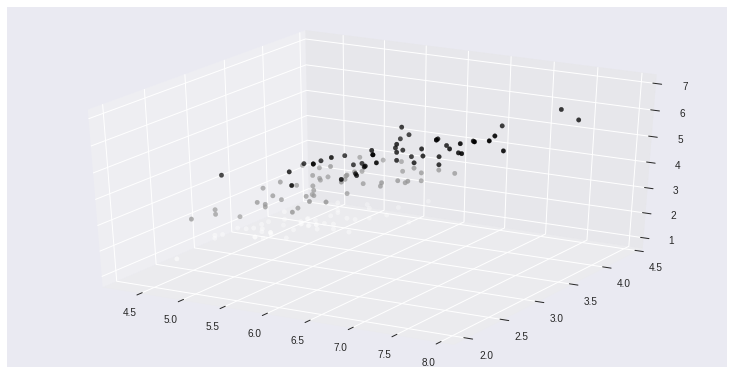

In [31]:
iris = datasets.load_iris()
Dx = iris.data[:, :3]  # we only take the first three features.
Dy = iris.target
print(iris.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)



## Procedimiento: <br>
Aplicaremos los siguientes 5 algoritmos para resolver el problema:


1.   K-Means
2.   Mixturas
3.   Aglomerativo jerárquico
4.   Spectral
5.   DBScan





In [0]:
 def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j]
                                          )) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)
  
def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))
  
def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([totales[k]
                   * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])
  
def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

In [0]:
#Medidas Intrinsecas

def medida_RMSSTD(X, Xyp, cXs):
    labels = np.unique(Xyp)
    num = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    den = X.shape[1] * np.sum([np.sum(Xyp==labels[k])-1 for k in np.arange(labels.size)])

    return np.sqrt(num/den)
  
  
def medida_calinski_harabasz(Dx, Dyp):
  return calinski_harabaz_score(Dx, Dyp)

def medida_silueta(Dx, Dyp):
  return silhouette_score(Dx,Dyp)

In [0]:
metricas_evaluacion=[]
for i in range(25):
    metricas_evaluacion.append([])
    for j in range(2):
        metricas_evaluacion[i].append(None)





### Algoritmo K-means:

In [0]:
#Establecemos distintas configuraciones del algoritmo
K = range(2,6)

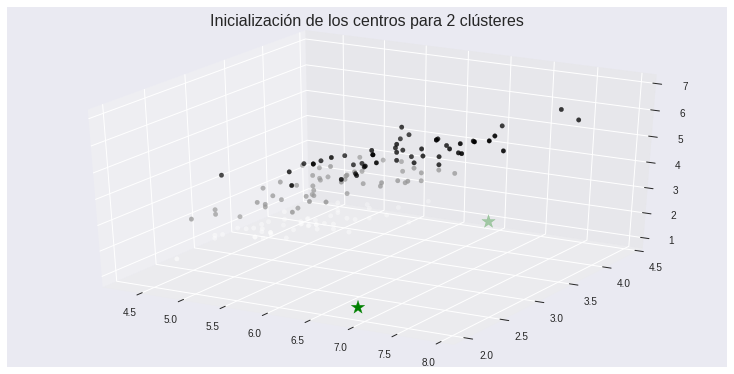

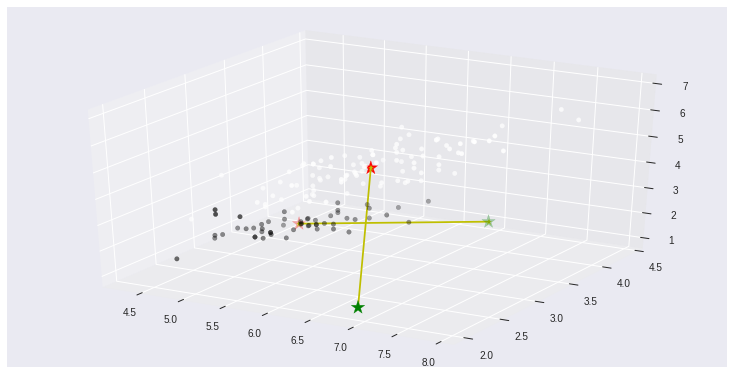

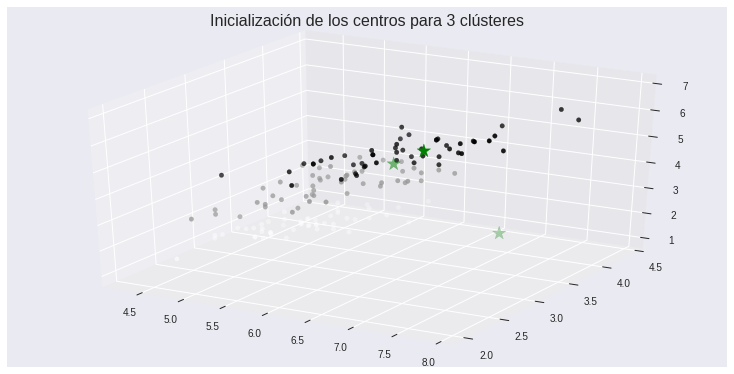

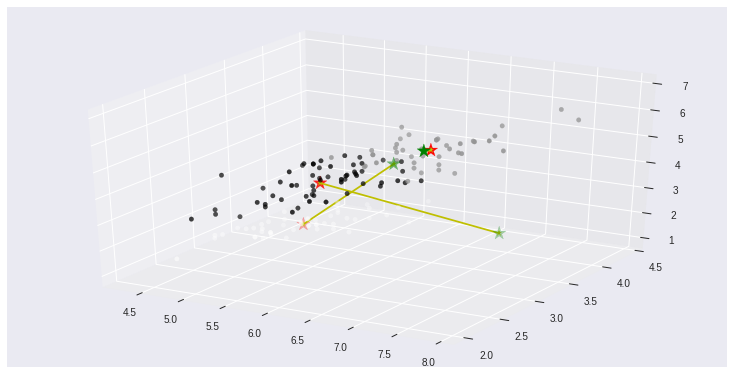

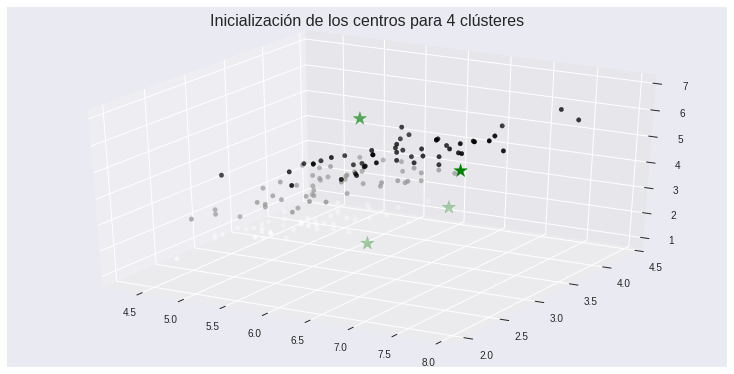

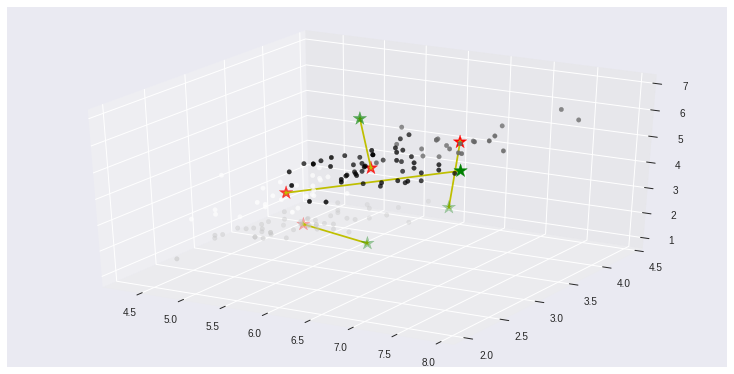

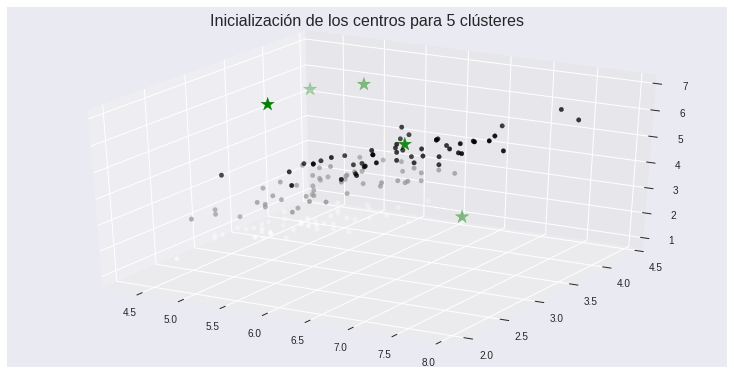

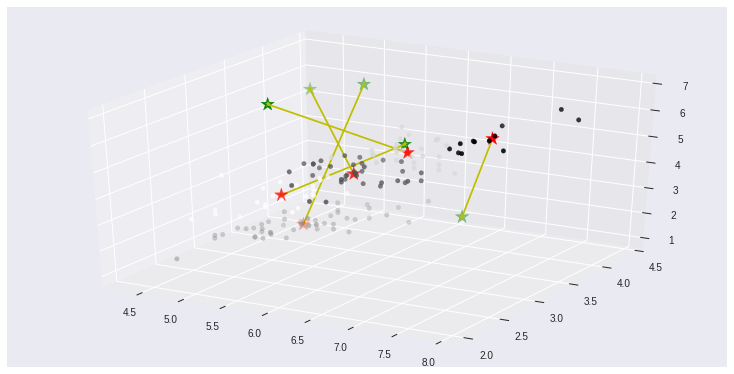

In [36]:
#Iteramos el algoritmo sobre las distintas configuraciones
KNN_metrics = []
for i in range(len(K)):
  cDx = np.zeros(K[i]*Dx.shape[1])
  cDx.shape = (K[i],Dx.shape[1])

  def random_sample_float(n, mi, ma):
      return (ma - mi) * np.random.random_sample(n) + mi

  for d in np.arange(Dx.shape[1]):
      cDx[:,d] = random_sample_float(K[i], np.min(Dx[:,d]), np.max(Dx[:,d]))



  title = 'Inicialización de los centros para ' + str(K[i]) + ' clústeres'
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(title, fontsize=16)
  ax = Axes3D(fig)
  ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)
  ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='g')
  
  #print('Los centros iniciales elegidos aleatoriamente son:')
  #print(cDx)

  from sklearn.cluster import KMeans

  # Se inicializa KMeans con el número de clústeres a buscar
  modelo = KMeans(n_clusters=K[i])
  # Se aprende el 
  modelo = modelo.fit(Dx)
  # Predicting the clusters
  Dyp_sk = modelo.predict(Dx)
  # Obtener los centros de los clústeres
  cDx_sk = modelo.cluster_centers_

  mC_sk = matriz_confusion(Dy,Dyp_sk)
  
  KNN_metrics_title=['medida de Error', 'medida de Pureza', 'medida F1','índice Calinski_Harabasz','Ancho de Silueta']
  KNN_metrics.append([medida_error(mC_sk), medida_pureza(mC_sk), medida_f1(mC_sk),medida_calinski_harabasz(Dx, Dyp_sk),medida_silueta(Dx, Dyp_sk)])

  # Ver asignaciones finales

  fig = plt.figure(figsize=(10,5))
  ax = Axes3D(fig)
  for k in np.arange(K[i]):
          ax.plot( [cDx[k,0], cDx_sk[k,0]],[cDx[k,1], cDx_sk[k,1]],[cDx[k,2], cDx_sk[k,2]], linestyle='-', marker='*', c='y')
  ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dyp_sk)
  ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='g')
  ax.scatter(cDx_sk[:,0], cDx_sk[:,1], cDx_sk[:,2], marker='*', s=200, c='r')



In [0]:
#Calculamos la mejor configuración para cada métrica
best_conf=[]
for j in range(len(KNN_metrics_title)):
 
  if KNN_metrics_title[j] in ['medida de Error']:
    best_conf.append(np.argmin([KNN_metrics[i][j] for i in range(len(K))]))
  
  else:
    best_conf.append(np.argmax([KNN_metrics[i][j] for i in range(len(K))]))


In [38]:
#Sabiendo que configuración es mejor para cada métrica, decidimos cual es la mejor configuración en general
print('El mejor valor de K (número de clústeres) para cada métrica es: \n')

for i in range(len(KNN_metrics_title)):
  print('* ', KNN_metrics_title[i], ' : K = ', K[best_conf[i]], 'clústeres')

El mejor valor de K (número de clústeres) para cada métrica es: 

*  medida de Error  : K =  2 clústeres
*  medida de Pureza  : K =  5 clústeres
*  medida F1  : K =  3 clústeres
*  índice Calinski_Harabasz  : K =  3 clústeres
*  Ancho de Silueta  : K =  2 clústeres


Observamos que las mejores configuraciones son para 2 y 3 clústeres, entre los cuáles seleccionaríamos como **mejor configuración** la opción de **3 clústeres** por ser la que más se asemeja a la agrupación real.

In [0]:
######
#Guardamos las métricas en la matriz de métricas:
metricas_evaluacion[0][0]="Kmean medida error"
metricas_evaluacion[0][1]=KNN_metrics[1][0]
metricas_evaluacion[1][0]="Kmean pureza del agrupamiento"
metricas_evaluacion[1][1]=KNN_metrics[1][1]
metricas_evaluacion[2][0]="Kmean F1"
metricas_evaluacion[2][1]=KNN_metrics[1][2]
metricas_evaluacion[3][0]="Kmean Calinski_Harabasz"
metricas_evaluacion[3][1]=KNN_metrics[1][3]
metricas_evaluacion[4][0]="Kmean silueta"
metricas_evaluacion[4][1]=KNN_metrics[1][4]

### Algoritmo Mixturas:

El algoritmo EM tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en inicializar el modelo. Se eligen unos centros iniciales de manera aleatoria, unas matrices de covarianzas fijas y unos pesos iniciales para las diferentes componentes. Sin más información, lo más normal sería asignar a todas las componentes el mismo peso.

In [0]:
#Establecemos distintas configuraciones del algoritmo
K = range(2,6)

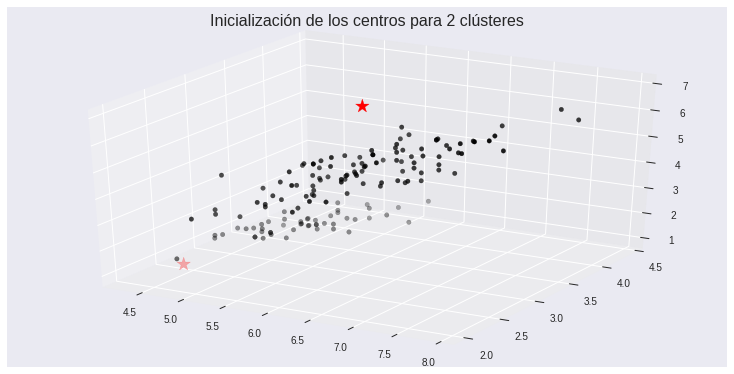

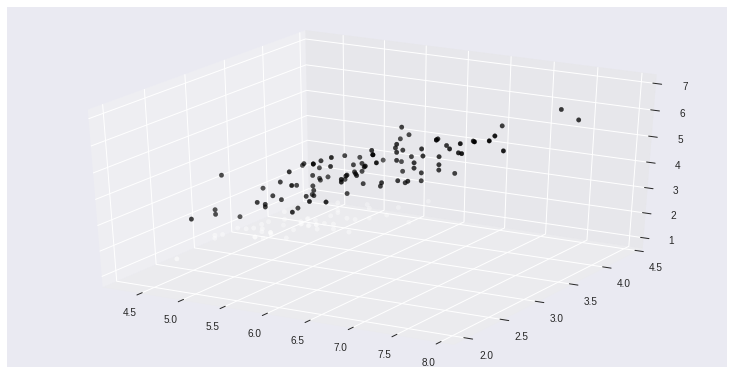

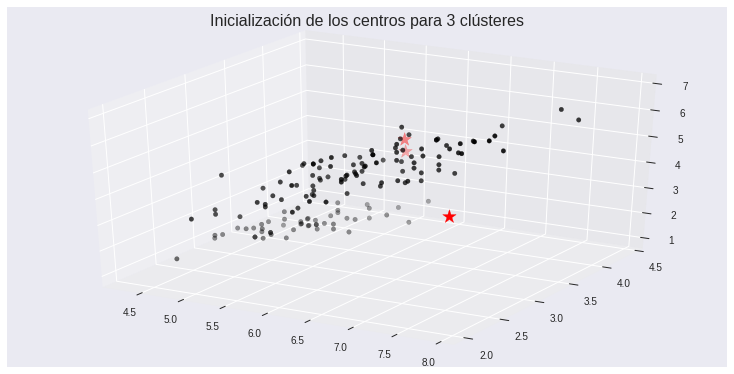

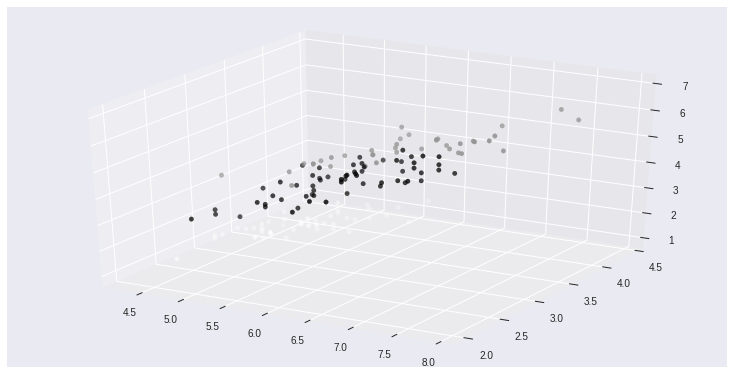

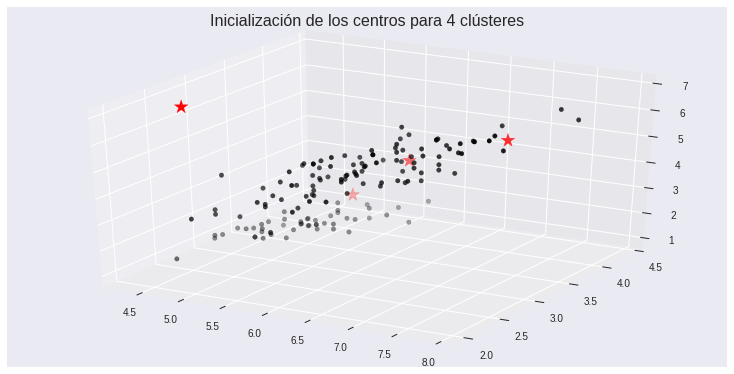

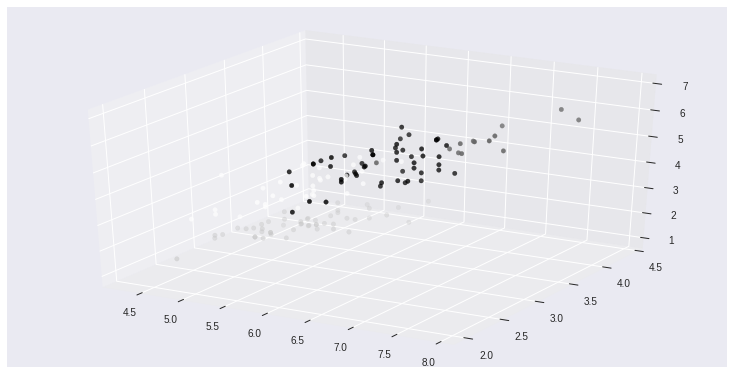

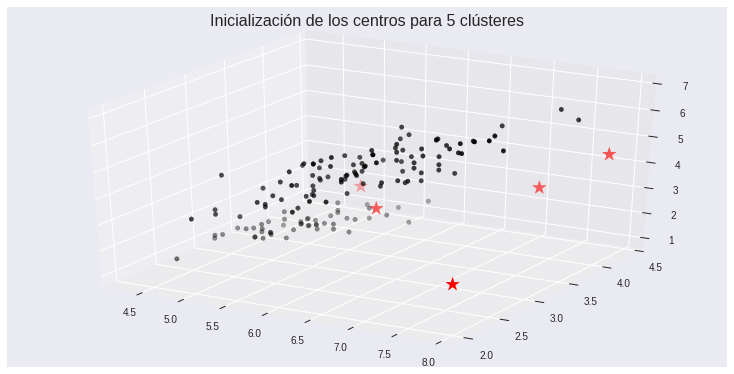

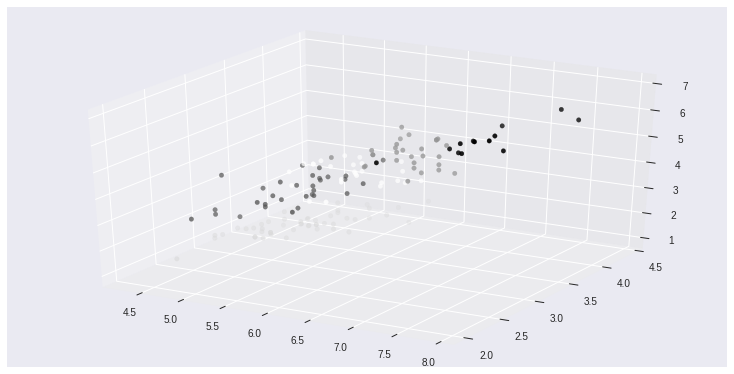

In [41]:
#Iteramos el algoritmo sobre las distintas configuraciones
Mixturas_metrics = []
for i in range(len(K)):

  # Asignar unas matrices de covarianzas iniciales
  sigmas = []
  for k in np.arange(K[i]):
      sigmas.append( np.diag( 0.1 * np.ones( Dx.shape[1] ) ) )

  # Inicialmente consideramos que todas las componentes tienen la misma probabilidad
  PIs = np.ones(K[i])/K[i]
  
  def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

  # Elegir unos centros (uno para cada componente) de manera aleatoria
  cDx = np.zeros(K[i]*Dx.shape[1])
  cDx.shape = (K[i],Dx.shape[1])

  for d in np.arange(Dx.shape[1]):
      cDx[:,d] = random_sample_float(K[i], np.min(Dx[:,d]), np.max(Dx[:,d]))
   
  # Mostramos las componentes iniciales
  title = 'Inicialización de los centros para ' + str(K[i]) + ' clústeres'
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(title,fontsize='16')
  ax = Axes3D(fig)
  ax.scatter(Dx[:,0],Dx[:,1], Dx[:,2], c='black')
  ax.scatter(cDx[:,0],cDx[:,1], cDx[:,2], marker='*', s=200, c='r')
   
      
  # Se inicializa el método con el número de clústeres (componentes) a buscar
  modelo = GaussianMixture(n_components = K[i], max_iter = 200)
  # Se aprende el modelo
  modelo = modelo.fit(Dx)
  # Se predicen las asignaciones a clústeres
  Dyp_sk = modelo.predict(Dx)
 

  # Medimos el rendimiento del algoritmo de ScikitLearn
  mC_sk = matriz_confusion(Dy,Dyp_sk)
  
  Mixturas_metrics_title=['medida de Error', 'medida de Pureza', 'medida F1','índice Calinski_Harabasz','Ancho de Silueta']
  Mixturas_metrics.append([medida_error(mC_sk), medida_pureza(mC_sk), medida_f1(mC_sk),medida_calinski_harabasz(Dx, Dyp_sk),medida_silueta(Dx, Dyp_sk)])

  # Ver asignaciones finales
  
  fig = plt.figure(figsize=(10,5))
  ax = Axes3D(fig)
  ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dyp_sk)





In [0]:
#Calculamos la mejor configuración para cada métrica
best_conf=[]
for j in range(len(Mixturas_metrics_title)):
 
  if Mixturas_metrics_title[j] in ['medida de Error']:
    best_conf.append(np.argmin([Mixturas_metrics[i][j] for i in range(len(K))]))
  
  else:
    best_conf.append(np.argmax([Mixturas_metrics[i][j] for i in range(len(K))]))



In [43]:
#Sabiendo que configuración es mejor para cada métrica, decidimos cual es la mejor configuración en general
print('El mejor valor de K (número de clústeres) para cada métrica es: \n')

for i in range(len(Mixturas_metrics_title)):
  print('* ', Mixturas_metrics_title[i], ' : K = ', K[best_conf[i]], 'clústeres')

El mejor valor de K (número de clústeres) para cada métrica es: 

*  medida de Error  : K =  2 clústeres
*  medida de Pureza  : K =  3 clústeres
*  medida F1  : K =  3 clústeres
*  índice Calinski_Harabasz  : K =  2 clústeres
*  Ancho de Silueta  : K =  2 clústeres


Observamos que la **mejor configuración** para la Mixtura Gaussiana es de 2 clústeres.

In [0]:
######
  #Guardamos las métricas en la matriz de métricas:
  metricas_evaluacion[5][0]="Mixturas medida error"
  metricas_evaluacion[5][1]=Mixturas_metrics[0][0]
  metricas_evaluacion[6][0]="Mixturas pureza del agrupamiento"
  metricas_evaluacion[6][1]=Mixturas_metrics[0][1]
  metricas_evaluacion[7][0]="Mixturas F1"
  metricas_evaluacion[7][1]=Mixturas_metrics[0][2]
  metricas_evaluacion[8][0]="Mixturas Calinski_Harabasz"
  metricas_evaluacion[8][1]=Mixturas_metrics[0][3]
  metricas_evaluacion[9][0]="Mixturas silueta"
  metricas_evaluacion[9][1]=Mixturas_metrics[0][4]
  




### Algoritmo Jerárquico aglomerativo

Usamos las funciones disponibles en las distintas librerias de Python

In [0]:
#Importamos librerias necesarias para los algoritmos aglomerativos
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree
# Importamos la libreria para el método dendrogram de scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


#Con el paámetro linkage podemos controlar los criterios usados. 
#Probaremos 3 criterios: disimilitud mínima : 'single'; máxima: 'complete'; y media: 'average'

#Dx viene definido al inicio del notebook y es comun para los 3 bloques.

modelo_single = AgglomerativeClustering(linkage="single")
modelo_single = modelo_single.fit(Dx)

modelo_complete = AgglomerativeClustering(linkage="complete")
modelo_complete = modelo_complete.fit(Dx)

modelo_average = AgglomerativeClustering(linkage="average")
modelo_average = modelo_average.fit(Dx)

Dendrograma según criterio de disimilitud: mínima, máxima, media


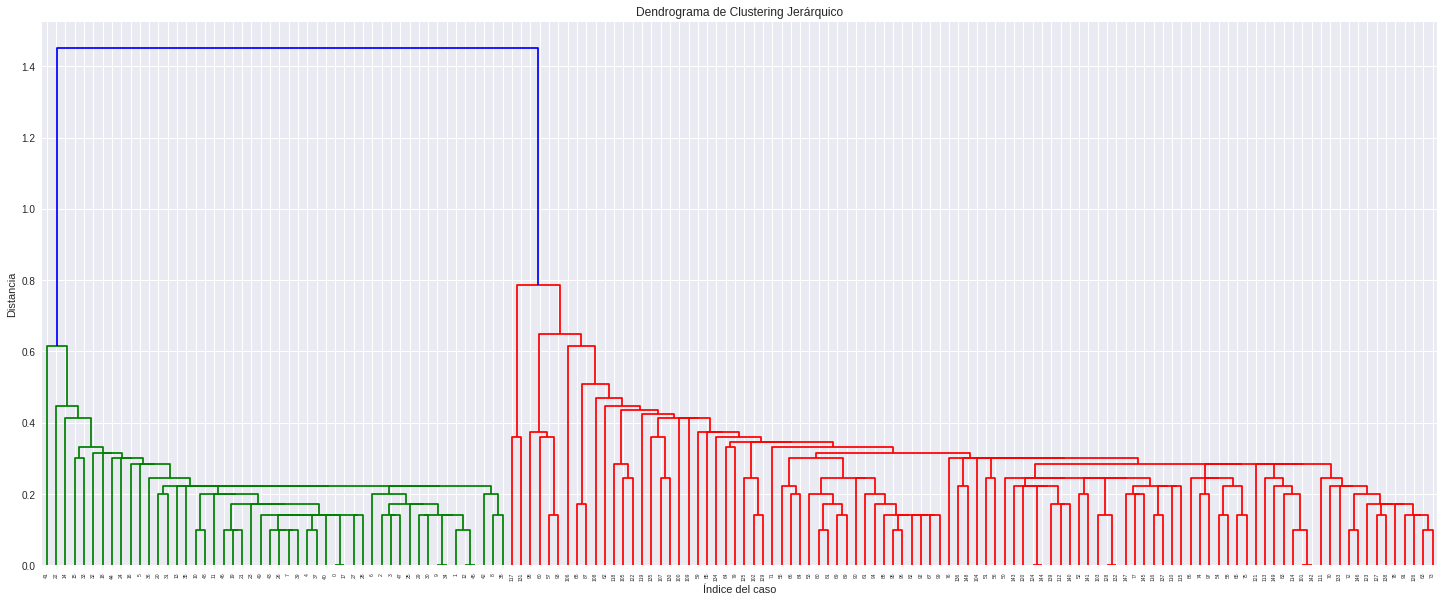

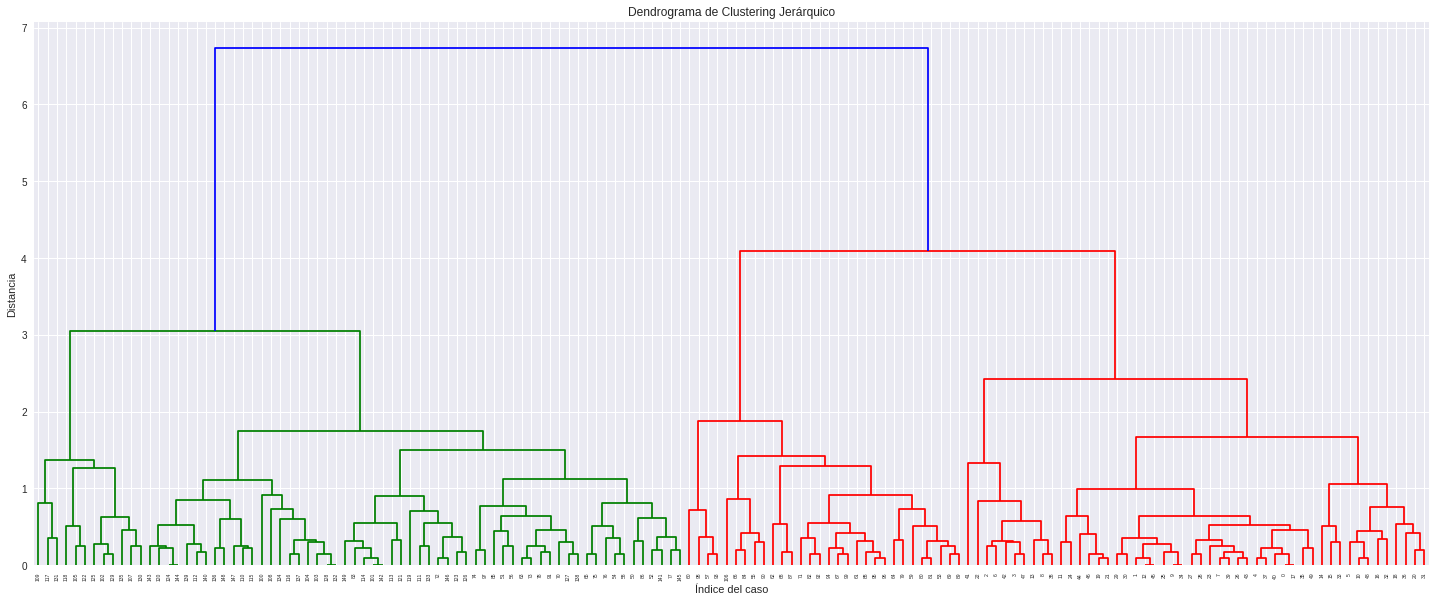

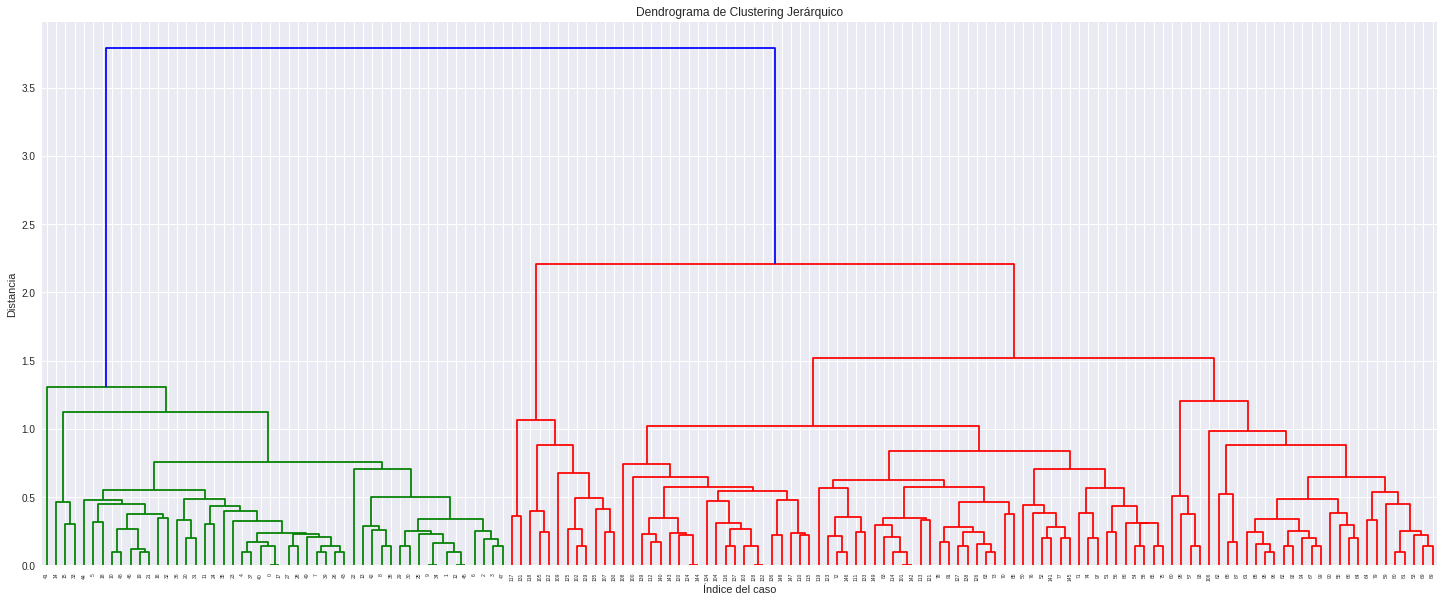

In [46]:
def matriz_enlaces(modelo):
  # Creamos la matriz de enlaces que necesita el método dendrogram de scipy
  uniones = modelo.children_
  # Las distancias y los tamaños, en esta ocasión, los asignamos de manera 
  # inocua para no alterar el resultado (no disponemos de la información completa)
  distancias = np.arange(uniones.shape[0])
  tamanyos = np.arange(2, uniones.shape[0]+2)
  mEnlaces = np.column_stack([uniones, distancias, tamanyos]).astype(float)

  return dendrogram(mEnlaces)

#función imprimir dendrograma
def plot_den(modelo):
  plt.figure(figsize=(25, 10))
  plt.title('Dendrograma de Clustering Jerárquico')
  plt.xlabel('Índice del caso')
  plt.ylabel('Distancia')
  dendrogram(modelo)
  plt.show() 
  
  
# Creamos la matriz de enlaces para cada criterio
#matriz_enlaces(modelo_single)
#matriz_enlaces(modelo_complete)
#matriz_enlaces(modelo_average)


modelo_single = linkage(Dx, 'single')   # disimilitud mínima
modelo_complete = linkage(Dx, 'complete') # disimilitud máxima
modelo_average = linkage(Dx, 'average')  # disimilitud media

#Representamos el dendrograma según cada criterio de disimilitud
print("Dendrograma según criterio de disimilitud: mínima, máxima, media")
plot_den(modelo_single)
plot_den(modelo_complete)
plot_den(modelo_average)

In [0]:
from sklearn.metrics import mutual_info_score, silhouette_score,  calinski_harabaz_score

def calcular_clusters(modelo, K):
  return cut_tree(modelo, n_clusters = K).flatten()

def evaluar_cluster(K):

    clust_single=calcular_clusters(modelo_single, K)
  
    clust_complete=calcular_clusters(modelo_complete, K)

    clust_average=calcular_clusters(modelo_average, K)

    return clust_single, clust_complete, clust_average
    
def plot_cluster(Dx, Dy, vector_clusters):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos originales')
    plt.figure(figsize=(25, 10))
    

    ax[1].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[0], cmap='rainbow')
    ax[1].set_title('Disimilitud mínima, k=%s'%K)
        

    ax[2].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[1], cmap='rainbow')
    ax[2].set_title('Disimilitud máxima, k=%s'%K)
    

    ax[3].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[2], cmap='rainbow')
    ax[3].set_title('Disimilitud media, k=%s'%K)
    
    plt.figure()


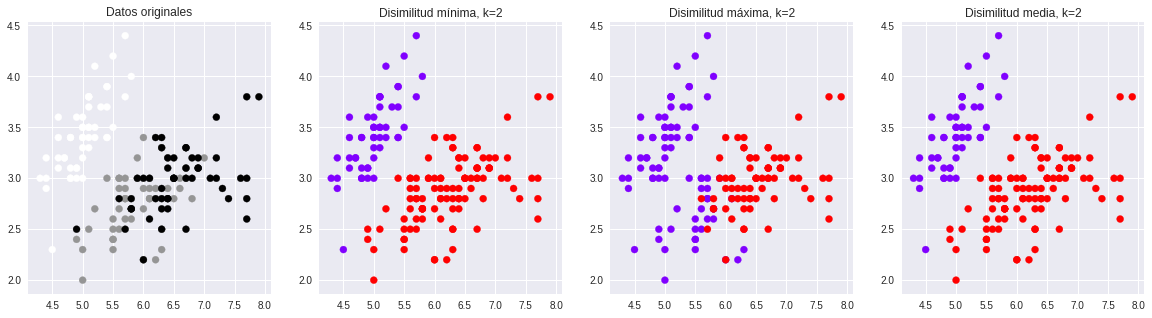

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

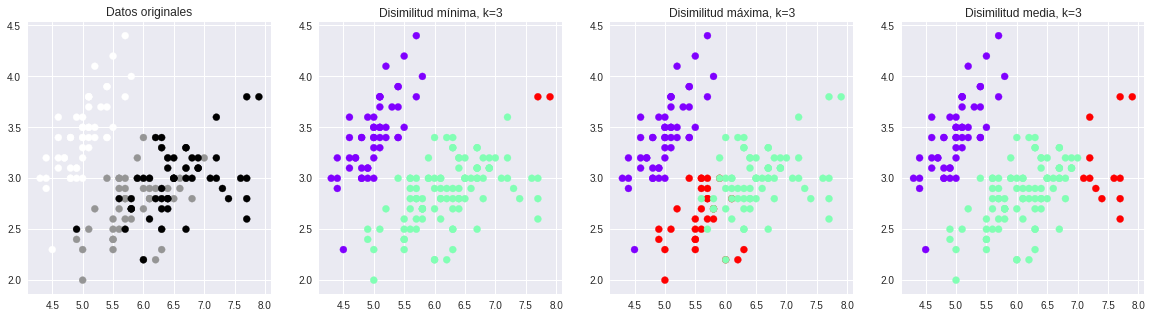

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

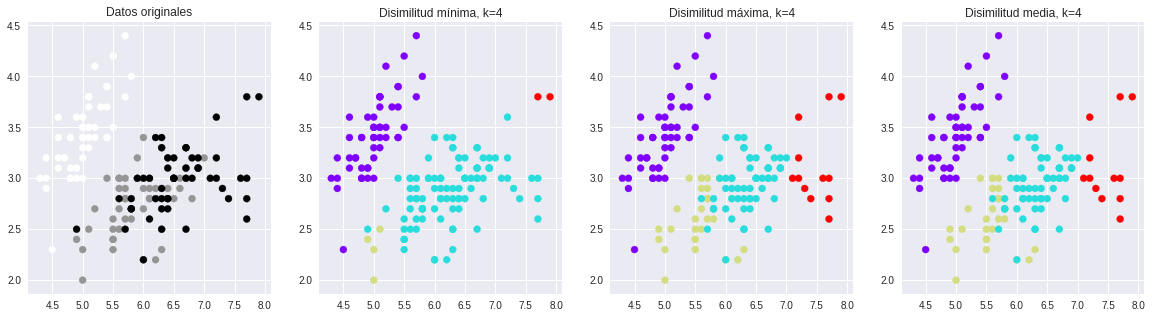

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

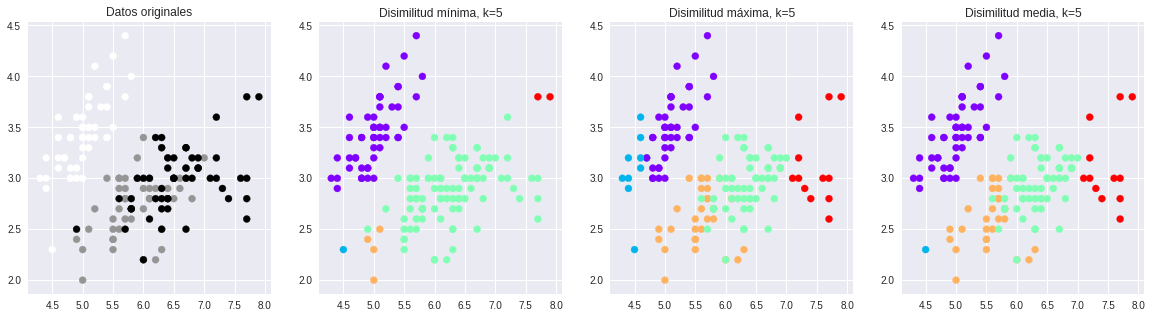

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

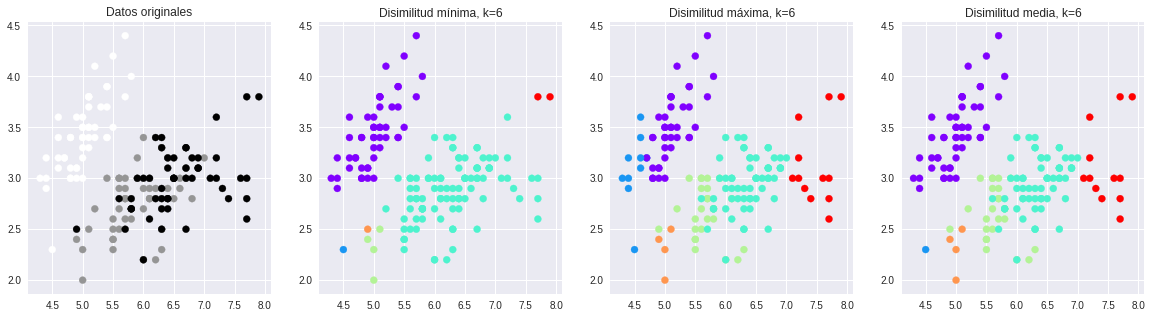

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [49]:
#Evaluamos el método según diferentes valores de K y usando los 3 criterios de disimilitud: mínima, máxima, media

index_k=0
vector_clusters = {}
for K in range(2,7):
  vector_clusters[index_k]=evaluar_cluster(K)
  plot_cluster(Dx, Dy, vector_clusters[index_k])
  index_k=index_k+1

In [0]:
for i in range(len(vector_clusters)):
  for y in range(len(vector_clusters[i])):
    mC = matriz_confusion(Dy,vector_clusters[i][y])
    ######
    if i==1:
      #Guardamos las métricas en la matriz de métricas:
      metricas_evaluacion[10][0]=("Jerarquico medida error " +'k=%s'%(i+2))
      metricas_evaluacion[10][1]=medida_error(mC)
      metricas_evaluacion[11][0]=("Jerarquico pureza agrupamiento " +'k=%s'%(i+2))
      metricas_evaluacion[11][1]=medida_pureza(mC)
      metricas_evaluacion[12][0]=("Jerarquico F1 " +'k=%s'%(i+2))
      metricas_evaluacion[12][1]=medida_f1(mC)
      metricas_evaluacion[13][0]=("Jerarquico Silhouette " +'k=%s'%(i+2))
      metricas_evaluacion[13][1]=silhouette_score(Dx,vector_clusters[i][y])
      metricas_evaluacion[14][0]=("Jerarquico calinski_harabaz " +'k=%s'%(i+2))
      metricas_evaluacion[14][1]=calinski_harabaz_score(Dx,vector_clusters[i][y])


### Algroritmo Spectral

In [0]:
from sklearn.cluster import SpectralClustering

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


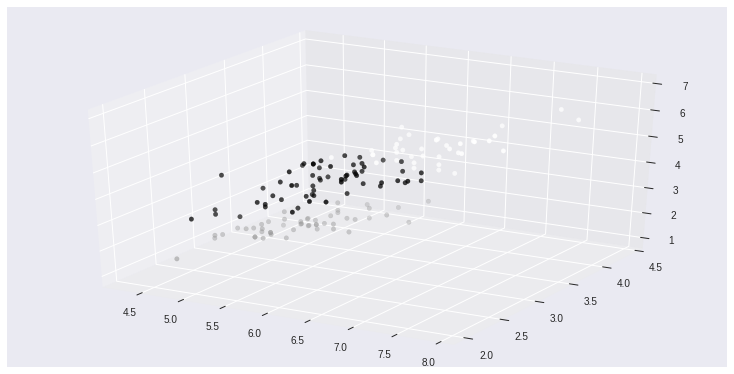

In [52]:
K=3
knn = 5
clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=clustering.labels_)

In [0]:
mC = matriz_confusion(Dy,clustering.labels_)

In [54]:
error=1
F1=0

for knn in range (1,15):
  K=3
  
  clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)
  
  mC = matriz_confusion(Dy,clustering.labels_)
  medida_error(mC)
  
  if  medida_f1(mC)>F1: # medida_error(mC)<error:
    Vecinos=knn
    error=medida_error(mC)
    F1=medida_f1(mC)
    

knn=Vecinos    
clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)
mC = matriz_confusion(Dy,clustering.labels_)


#Guardamos las métricas en la matriz de métricas:
metricas_evaluacion[15][0]=("Spectral medida error")
metricas_evaluacion[15][1]=medida_error(mC)
metricas_evaluacion[16][0]=("Spectral pureza agrupamiento")
metricas_evaluacion[16][1]=medida_pureza(mC)
metricas_evaluacion[17][0]=("DBScan F1")
metricas_evaluacion[17][1]=medida_f1(mC)
metricas_evaluacion[18][0]=("DBScan Silhouette ")
metricas_evaluacion[18][1]=silhouette_score(Dx,clustering.labels_)
metricas_evaluacion[19][0]=("DBScan calinski_harabaz ")
metricas_evaluacion[19][1]=calinski_harabaz_score(Dx,clustering.labels_)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklea

### Algoritmo DBScan

In [0]:
from sklearn.cluster import DBSCAN

eps=0.7
M=10

clustering = DBSCAN(eps=eps, min_samples=M).fit(Dx)

In [0]:
error=1
F1=0

for M in range(3,20):
  for eps in np.arange(0.3, 0.8, 0.05):
  
    clustering = DBSCAN(eps=eps, min_samples=M).fit(Dx)
    mC = matriz_confusion(Dy,clustering.labels_)
    
    if  medida_f1(mC)>F1: # medida_error(mC)<error:
      MejorM=M
      mejorEps=eps
      error=medida_error(mC)
      F1=medida_f1(mC)
  

eps=mejorEps
M=MejorM


clustering = DBSCAN(eps=eps, min_samples=M).fit(Dx)


mC = matriz_confusion(Dy,clustering.labels_)

 #Guardamos las métricas en la matriz de métricas:
metricas_evaluacion[20][0]=("DBScan medida error")
metricas_evaluacion[20][1]=medida_error(mC)
metricas_evaluacion[21][0]=("DBScan pureza agrupamiento")
metricas_evaluacion[21][1]=medida_pureza(mC)
metricas_evaluacion[22][0]=("DBScan F1")
metricas_evaluacion[22][1]=medida_f1(mC)
metricas_evaluacion[23][0]=("Spectral Silhouette ")
metricas_evaluacion[23][1]=silhouette_score(Dx,clustering.labels_)
metricas_evaluacion[24][0]=("Spectral calinski_harabaz ")
metricas_evaluacion[24][1]=calinski_harabaz_score(Dx,clustering.labels_)

## Comparativa de mérticas

Comparamos los 5 distintos algoritmos y encontramos el algoritmo que obtiene mejor métrica

In [59]:
#metrica medida del error
num_metricas=5
metricas_error=[]
for i in range(5):
    metricas_error.append([])
    for j in range(2):
        metricas_error[i].append(None)

ind=0
metricas_error
for it in range(0,5):
  metricas_error[it][0]=metricas_evaluacion[ind][0]
  metricas_error[it][1]=metricas_evaluacion[ind][1]
  ind=ind+num_metricas
  
#Imprimimos tabla de medidas
df_error = pd.DataFrame(data=metricas_error)
print("Métricas Error")
print(df_error)
print("")
#Buscamos la mejor métrica
mejor_error=df_error.loc[df_error[1].idxmin()]

#metrica medida pureza

metricas_pureza=[]
for i in range(5):
    metricas_pureza.append([])
    for j in range(2):
        metricas_pureza[i].append(None)

ind=1
metricas_pureza
for it in range(0,5):
  metricas_pureza[it][0]=metricas_evaluacion[ind][0]
  metricas_pureza[it][1]=metricas_evaluacion[ind][1]
  ind=ind+num_metricas
  
#Imprimimos tabla de medidas 
df_pureza = pd.DataFrame(data=metricas_pureza)
print("Métricas Pureza")
print(df_pureza)
print("")
#Buscamos la mejor métrica 
mejor_pureza=df_pureza.loc[df_pureza[1].idxmax()]

#metrica medida F1

metricas_F1=[]
for i in range(5):
    metricas_F1.append([])
    for j in range(2):
        metricas_F1[i].append(None)

ind=2
metricas_F1
for it in range(0,5):
  metricas_F1[it][0]=metricas_evaluacion[ind][0]
  metricas_F1[it][1]=metricas_evaluacion[ind][1]
  ind=ind+num_metricas
  
#Imprimimos tabla de medidas
df_F1 = pd.DataFrame(data=metricas_F1) 
print("Métricas F1")
print(df_F1)
print("")
#Buscamos la mejor métrica
mejor_F1=df_F1.loc[df_F1[1].idxmax()]  

#metrica medida Silhouette

metricas_Silhouette=[]
for i in range(5):
    metricas_Silhouette.append([])
    for j in range(2):
        metricas_Silhouette[i].append(None)

ind=3
for it in range(0,5):
  metricas_Silhouette[it][0]=metricas_evaluacion[ind][0]
  metricas_Silhouette[it][1]=metricas_evaluacion[ind][1]
  ind=ind+num_metricas
  
#Imprimimos tabla de medidas
df_Silhouette = pd.DataFrame(data=metricas_Silhouette)  
print("Métricas Silhouette")
print(df_Silhouette)
print("")

#Buscamos la mejor métrica
mejor_Silhouette=df_Silhouette.loc[df_Silhouette[1].idxmax()]


#metrica medida calinski_harabaz

metricas_calinski_harabaz=[]
for i in range(5):
    metricas_calinski_harabaz.append([])
    for j in range(2):
        metricas_calinski_harabaz[i].append(None)

ind=4
for it in range(0,5):
  metricas_calinski_harabaz[it][0]=metricas_evaluacion[ind][0]
  metricas_calinski_harabaz[it][1]=metricas_evaluacion[ind][1]
  ind=ind+num_metricas
  
#Imprimimos tabla de medidas
df_calinski = pd.DataFrame(data=metricas_calinski_harabaz) 
print("Métricas calinski_harabaz")
print(df_calinski)
print("")
#Buscamos la mejor métrica
mejor_calinski=df_calinski.loc[df_calinski[1].idxmax()]

print("")
print("Algoritmos con mejor métrica:")
print("")
print("Medida error:")
print(mejor_error[0])
print("")

print("Medida pureza:")
print(mejor_pureza[0])
print("")

print("Medida F1:")
print(mejor_F1[0])
print("")

print("Medida Silhouette:")
print(mejor_Silhouette[0])
print("")

print("Medida calinski harabaz:")
print(mejor_calinski[0])
print("")

Métricas Error
                             0         1
0           Kmean medida error  0.120000
1        Mixturas medida error  0.000000
2  Jerarquico medida error k=3  0.080000
3        Spectral medida error  0.100000
4          DBScan medida error  0.013333

Métricas Pureza
                                    0         1
0       Kmean pureza del agrupamiento  0.880000
1    Mixturas pureza del agrupamiento  0.666667
2  Jerarquico pureza agrupamiento k=3  0.746667
3        Spectral pureza agrupamiento  0.900000
4          DBScan pureza agrupamiento  0.680000

Métricas F1
                   0         1
0           Kmean F1  0.879227
1        Mixturas F1  0.777778
2  Jerarquico F1 k=3  0.758454
3          DBScan F1  0.898281
4          DBScan F1  0.774775

Métricas Silhouette
                            0           1
0     Kmean Calinski_Harabasz  556.170361
1  Mixturas Calinski_Harabasz  496.721260
2   Jerarquico Silhouette k=3    0.555198
3          DBScan Silhouette     0.549805
4   

# Problema 2:
## Datos con agrupamiento real desconocido:<br>
Escogemos como base de datos de agrupamiento desconocido el data set ** wine** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html 
En este segundo problema, no nos interesa el agrupamiento real, así que no tendremos variable Dy.
Consta de 178 entradas.
<br>


### Carga del dataset <br>
Cargamos el dataset en el notebook y lo guardamos en la variable Dx, para ser usado a lo largo del trabajo.<br>
Dx: contiene los  valores de las caracteristicas de cada entrada<br>


(178, 13)


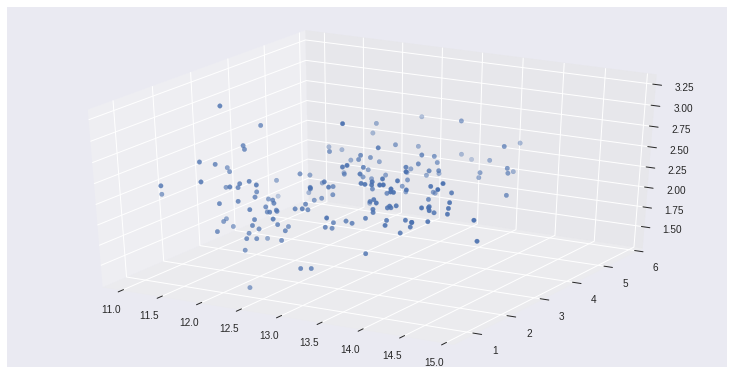

In [78]:
wine = datasets.load_wine()
Dx = wine.data[:, :3]  # we only take the first three features.
print(wine.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2])

In [0]:
metricas_evaluacion_int=[]
for i in range(20):
    metricas_evaluacion_int.append([])
    for j in range(2):
        metricas_evaluacion_int[i].append(None)


## Procedimiento: <br>
Aplicaremos los siguientes 5 algoritmos para resolver el problema:


1.   K-Means
2.   Mixturas
3.   Aglomerativo jerárquico
4.   Spectral
5.   DBScan

### Algoritmo K-means:

In [0]:
#Establecemos distintas configuraciones del algoritmo
K = range(2,6)

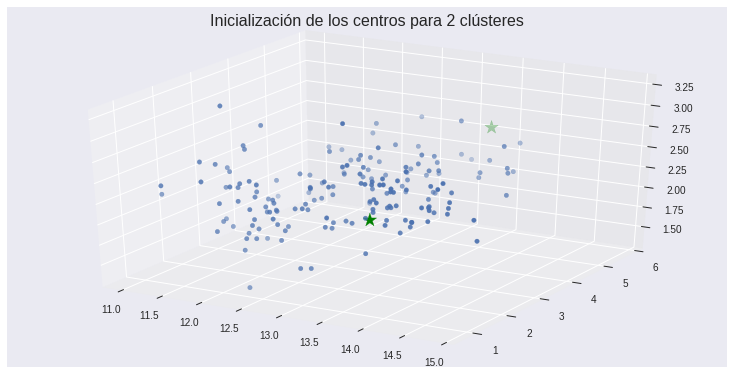

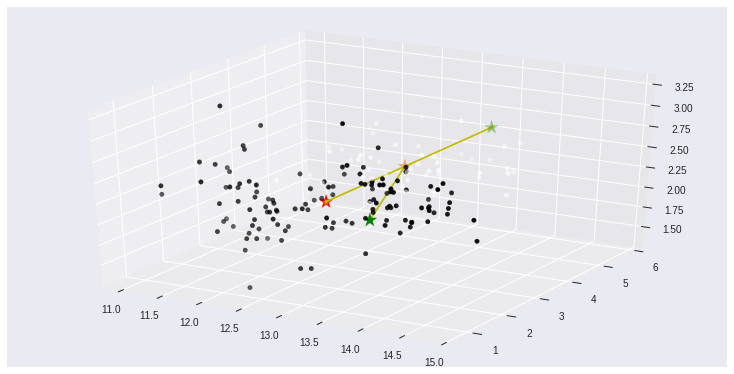

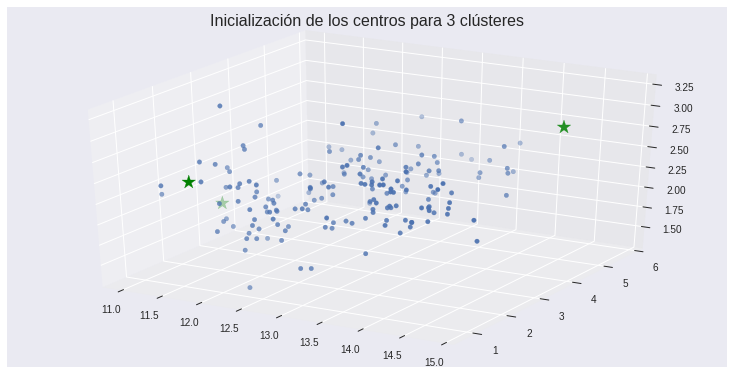

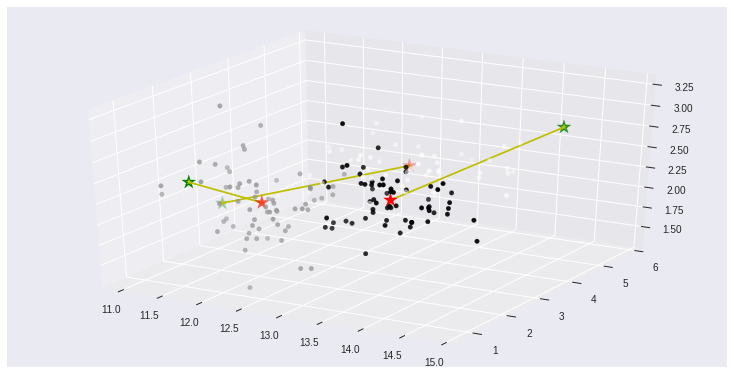

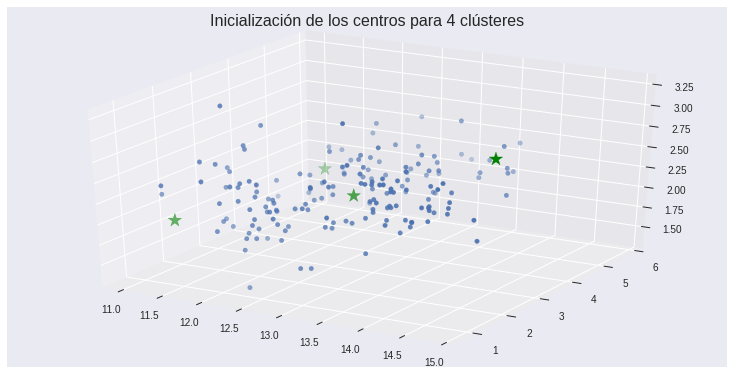

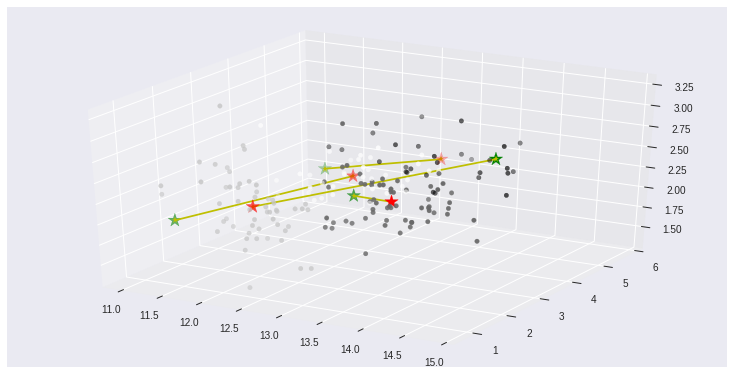

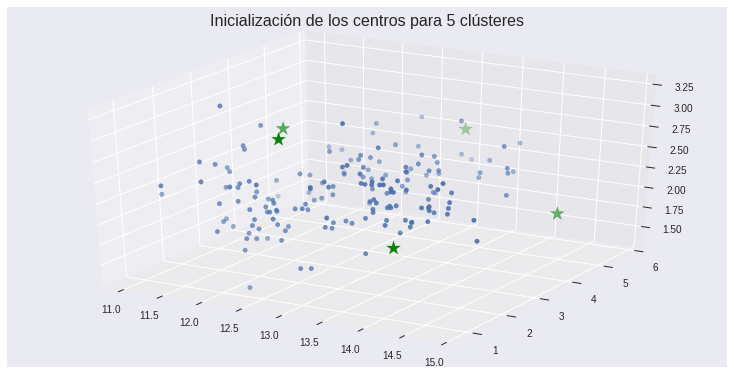

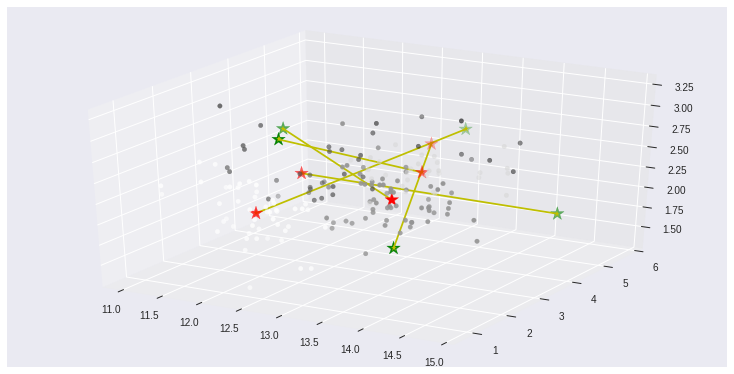

In [81]:
#Iteramos el algoritmo sobre las distintas configuraciones
KNN_metrics = []
for i in range(len(K)):
  cDx = np.zeros(K[i]*Dx.shape[1])
  cDx.shape = (K[i],Dx.shape[1])

  def random_sample_float(n, mi, ma):
      return (ma - mi) * np.random.random_sample(n) + mi

  for d in np.arange(Dx.shape[1]):
      cDx[:,d] = random_sample_float(K[i], np.min(Dx[:,d]), np.max(Dx[:,d]))



  title = 'Inicialización de los centros para ' + str(K[i]) + ' clústeres'
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(title, fontsize=16)
  ax = Axes3D(fig)
  ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2])
  ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='g')
  
  #print('Los centros iniciales elegidos aleatoriamente son:')
  #print(cDx)

  from sklearn.cluster import KMeans

  # Se inicializa KMeans con el número de clústeres a buscar
  modelo = KMeans(n_clusters=K[i])
  # Se aprende el 
  modelo = modelo.fit(Dx)
  # Predicting the clusters
  Dyp_sk = modelo.predict(Dx)
  # Obtener los centros de los clústeres
  cDx_sk = modelo.cluster_centers_


  
  KNN_metrics_title=['índice Calinski_Harabasz','Ancho de Silueta']
  KNN_metrics.append([medida_calinski_harabasz(Dx, Dyp_sk),medida_silueta(Dx, Dyp_sk)])

  # Ver asignaciones finales

  fig = plt.figure(figsize=(10,5))
  ax = Axes3D(fig)
  for k in np.arange(K[i]):
          ax.plot( [cDx[k,0], cDx_sk[k,0]],[cDx[k,1], cDx_sk[k,1]],[cDx[k,2], cDx_sk[k,2]], linestyle='-', marker='*', c='y')
  ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dyp_sk)
  ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='g')
  ax.scatter(cDx_sk[:,0], cDx_sk[:,1], cDx_sk[:,2], marker='*', s=200, c='r')


In [0]:
#Calculamos la mejor configuración para cada métrica
best_conf=[]
for j in range(len(KNN_metrics_title)):
 
  if KNN_metrics_title[j] in ['medida de Error']:
    best_conf.append(np.argmin([KNN_metrics[i][j] for i in range(len(K))]))
  
  else:
    best_conf.append(np.argmax([KNN_metrics[i][j] for i in range(len(K))]))

In [83]:
#Sabiendo que configuración es mejor para cada métrica, decidimos cual es la mejor configuración en general
print('El mejor valor de K (número de clústeres) para cada métrica es: \n')

for i in range(len(KNN_metrics_title)):
  print('* ', KNN_metrics_title[i], ' : K = ', K[best_conf[i]], 'clústeres')

El mejor valor de K (número de clústeres) para cada métrica es: 

*  índice Calinski_Harabasz  : K =  3 clústeres
*  Ancho de Silueta  : K =  2 clústeres


Observamos que las mejores configuraciones son para 2 y 3 clústeres, entre los cuáles seleccionaríamos como **mejor configuración** la opción de **3 clústeres** por ser la que más se asemeja a la agrupación real.

In [0]:
######
#Guardamos las métricas en la matriz de métricas:
metricas_evaluacion_int[0][0]="Kmean media Silhouette"
metricas_evaluacion_int[0][1]=KNN_metrics[1][0]
metricas_evaluacion_int[1][0]="Kmean calinski_harabasz"
metricas_evaluacion_int[1][1]=KNN_metrics[1][1]


### Algoritmo Mixturas:

El algoritmo EM tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en inicializar el modelo. Se eligen unos centros iniciales de manera aleatoria, unas matrices de covarianzas fijas y unos pesos iniciales para las diferentes componentes. Sin más información, lo más normal sería asignar a todas las componentes el mismo peso.

In [0]:
#Establecemos distintas configuraciones del algoritmo
K = range(2,6)

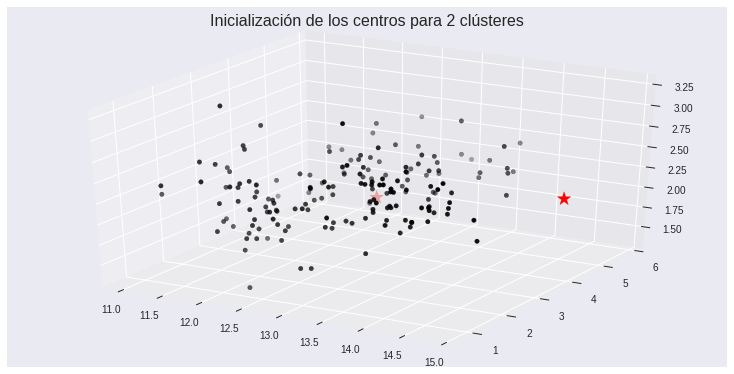

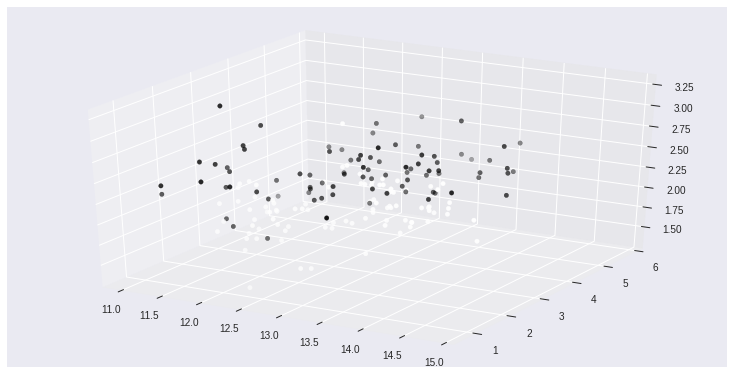

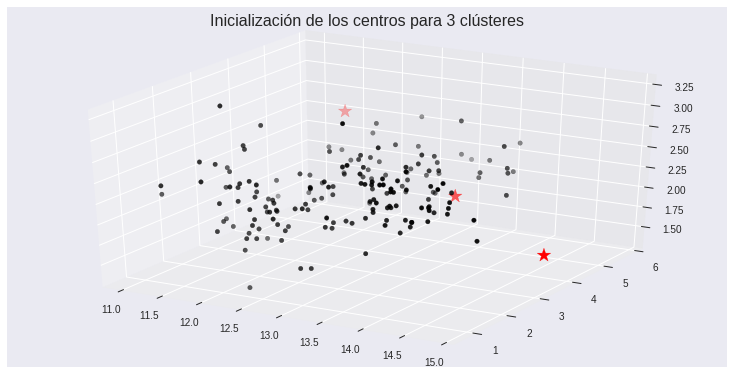

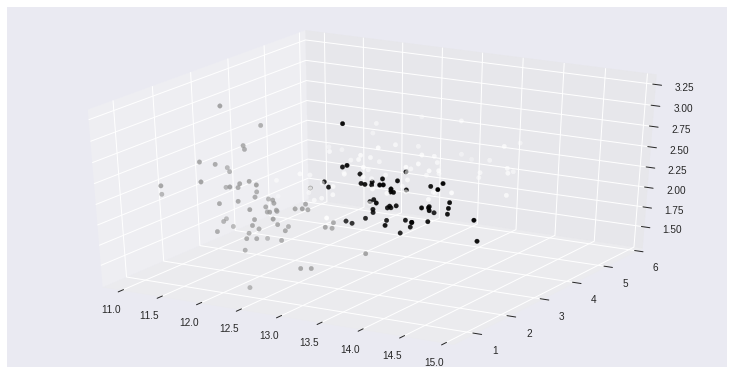

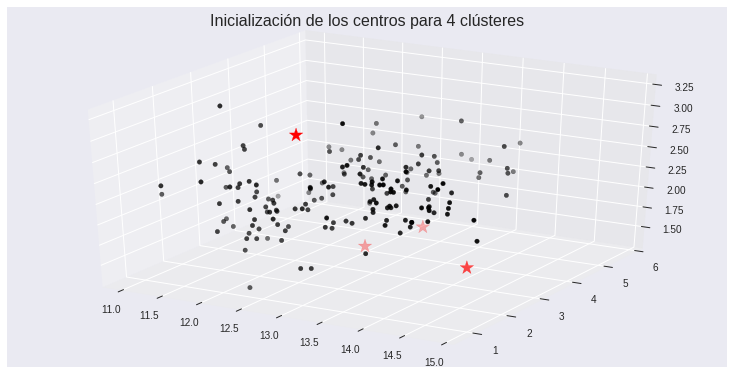

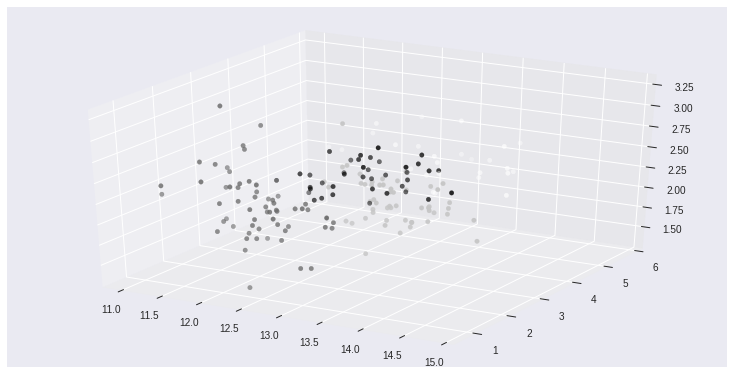

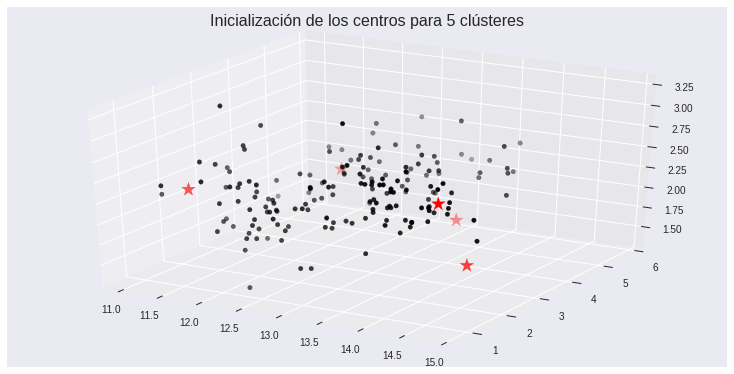

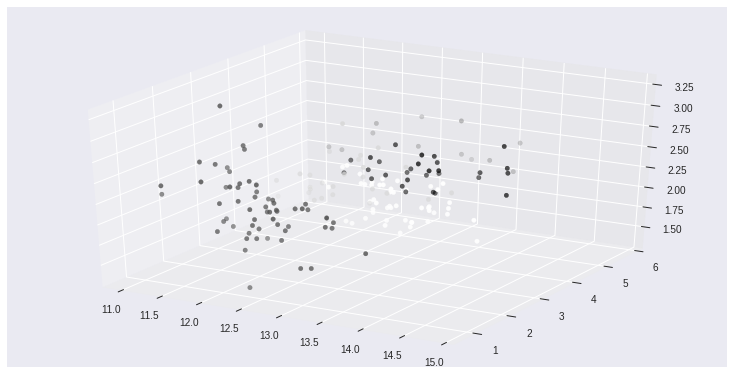

In [86]:
#Iteramos el algoritmo sobre las distintas configuraciones
Mixturas_metrics = []
for i in range(len(K)):

  # Asignar unas matrices de covarianzas iniciales
  sigmas = []
  for k in np.arange(K[i]):
      sigmas.append( np.diag( 0.1 * np.ones( Dx.shape[1] ) ) )

  # Inicialmente consideramos que todas las componentes tienen la misma probabilidad
  PIs = np.ones(K[i])/K[i]
  
  def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

  # Elegir unos centros (uno para cada componente) de manera aleatoria
  cDx = np.zeros(K[i]*Dx.shape[1])
  cDx.shape = (K[i],Dx.shape[1])

  for d in np.arange(Dx.shape[1]):
      cDx[:,d] = random_sample_float(K[i], np.min(Dx[:,d]), np.max(Dx[:,d]))
   
  # Mostramos las componentes iniciales
  title = 'Inicialización de los centros para ' + str(K[i]) + ' clústeres'
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(title,fontsize='16')
  ax = Axes3D(fig)
  ax.scatter(Dx[:,0],Dx[:,1], Dx[:,2], c='black')
  ax.scatter(cDx[:,0],cDx[:,1], cDx[:,2], marker='*', s=200, c='r')
   
      
  # Se inicializa el método con el número de clústeres (componentes) a buscar
  modelo = GaussianMixture(n_components = K[i], max_iter = 200)
  # Se aprende el modelo
  modelo = modelo.fit(Dx)
  # Se predicen las asignaciones a clústeres
  Dyp_sk = modelo.predict(Dx)
 
  
  Mixturas_metrics_title=['índice Calinski_Harabasz','Ancho de Silueta']
  Mixturas_metrics.append([medida_calinski_harabasz(Dx, Dyp_sk),medida_silueta(Dx, Dyp_sk)])

  # Ver asignaciones finales
  
  fig = plt.figure(figsize=(10,5))
  ax = Axes3D(fig)
  ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dyp_sk)

In [0]:
#Calculamos la mejor configuración para cada métrica
best_conf=[]
for j in range(len(Mixturas_metrics_title)):
 
  if Mixturas_metrics_title[j] in ['medida de Error']:
    best_conf.append(np.argmin([Mixturas_metrics[i][j] for i in range(len(K))]))
  
  else:
    best_conf.append(np.argmax([Mixturas_metrics[i][j] for i in range(len(K))]))

In [88]:
#Sabiendo que configuración es mejor para cada métrica, decidimos cual es la mejor configuración en general
print('El mejor valor de K (número de clústeres) para cada métrica es: \n')

for i in range(len(Mixturas_metrics_title)):
  print('* ', Mixturas_metrics_title[i], ' : K = ', K[best_conf[i]], 'clústeres')

El mejor valor de K (número de clústeres) para cada métrica es: 

*  índice Calinski_Harabasz  : K =  4 clústeres
*  Ancho de Silueta  : K =  3 clústeres


Observamos que la **mejor configuración** para la Mixtura Gaussiana es de 4 clústeres.

In [0]:

#Guardamos las métricas en la matriz de métricas:
metricas_evaluacion_int[2][0]="Mixturas Calinski_Harabasz"
metricas_evaluacion_int[2][1]=Mixturas_metrics[0][0]
metricas_evaluacion_int[3][0]="Mixturas silueta"
metricas_evaluacion_int[3][1]=Mixturas_metrics[0][1]

### Aglomerativo jerárquico

Dendrograma según criterio de disimilitud: mínima, máxima, media


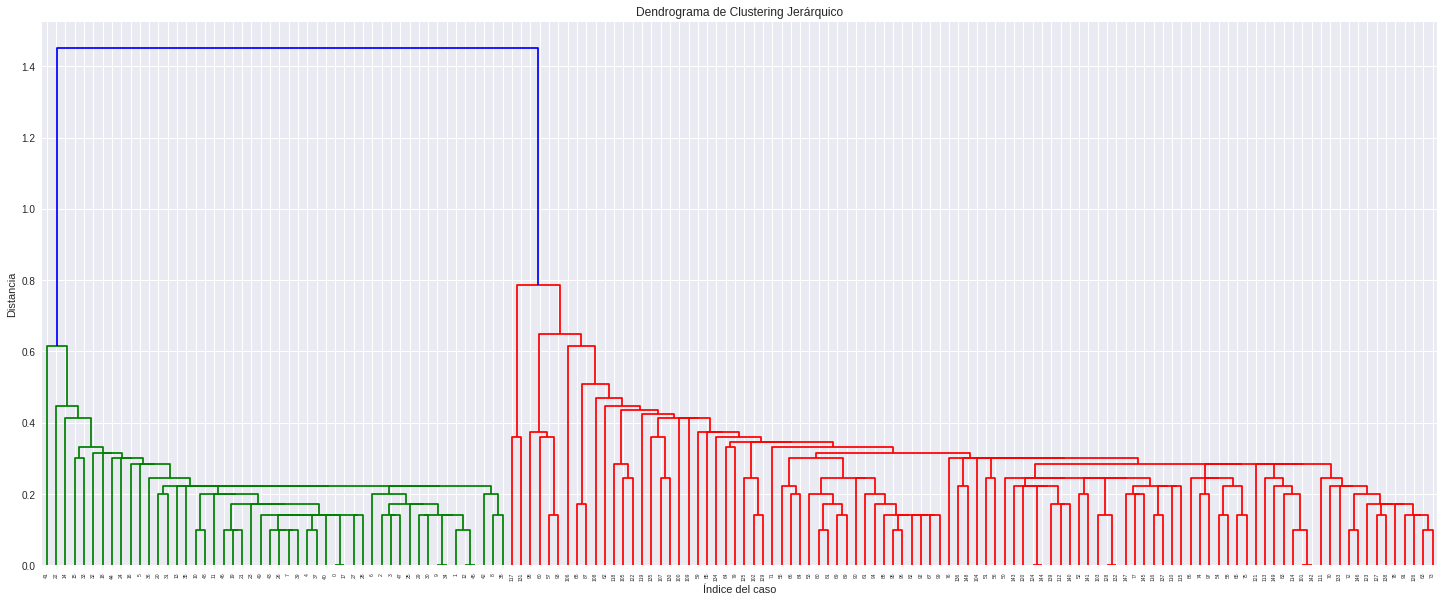

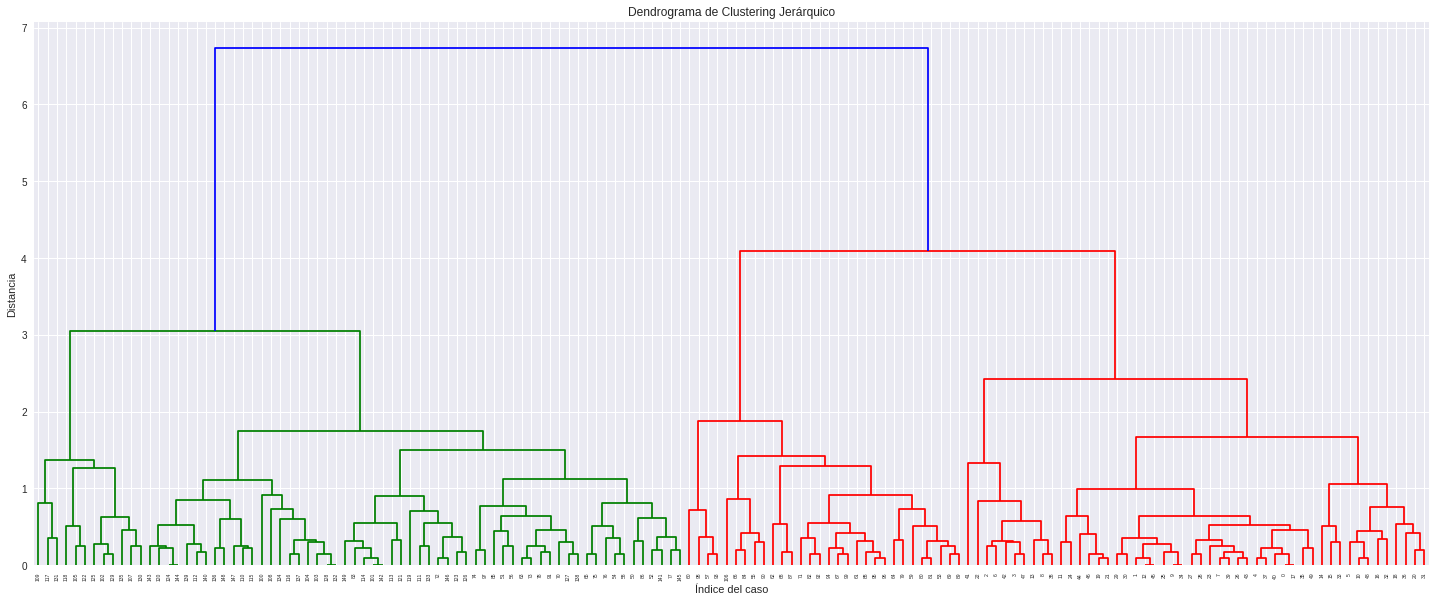

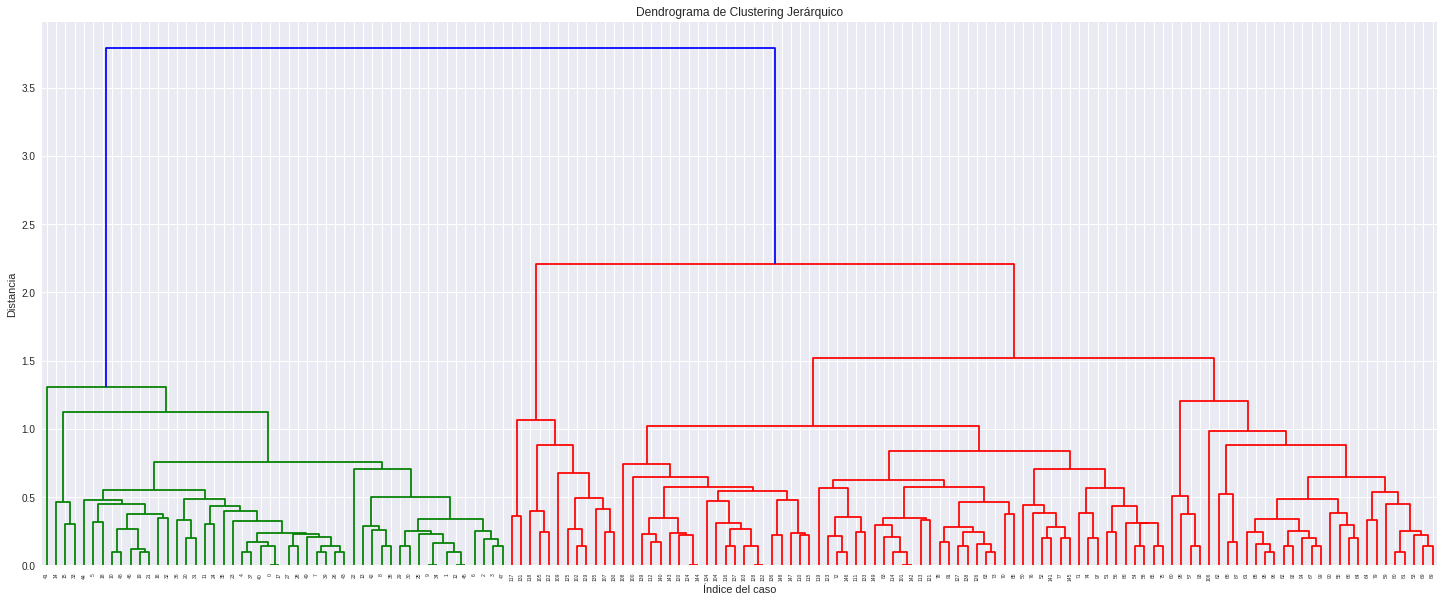

In [0]:
modelo_single_un = linkage(Dx, 'single')   # disimilitud mínima
modelo_complete_un = linkage(Dx, 'complete') # disimilitud máxima
modelo_average_un = linkage(Dx, 'average')  # disimilitud media

#Representamos el dendrograma según cada criterio de disimilitud
print("Dendrograma según criterio de disimilitud: mínima, máxima, media")
plot_den(modelo_single_un)
plot_den(modelo_complete_un)
plot_den(modelo_average_un)

In [0]:
def evaluar_cluster_un(K):

    clust_single=calcular_clusters(modelo_single_un, K)
  
    clust_complete=calcular_clusters(modelo_complete_un, K)

    clust_average=calcular_clusters(modelo_average_un, K)

    return clust_single, clust_complete, clust_average
    
def plot_cluster_un(Dx, vector_clusters):
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[0], cmap='rainbow')
    ax[0].set_title('Disimilitud mínima, k=%s'%K)
        

    ax[1].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[1], cmap='rainbow')
    ax[1].set_title('Disimilitud máxima, k=%s'%K)
    

    ax[2].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[2], cmap='rainbow')
    ax[2].set_title('Disimilitud media, k=%s'%K)
    
    plt.figure()

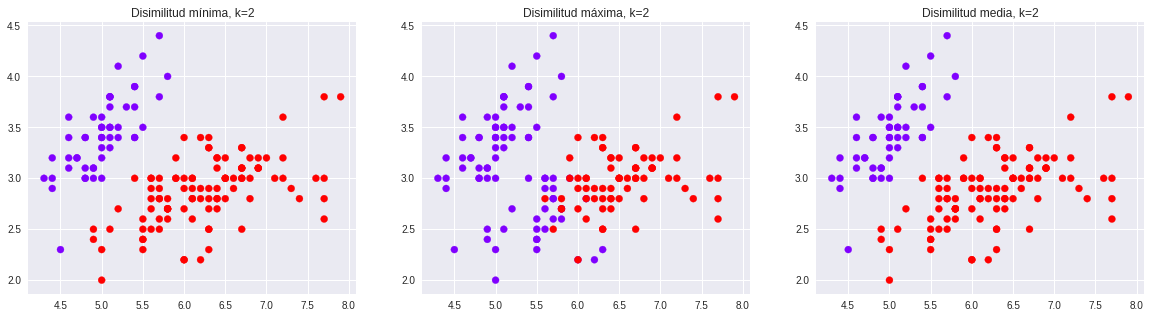

<Figure size 576x396 with 0 Axes>

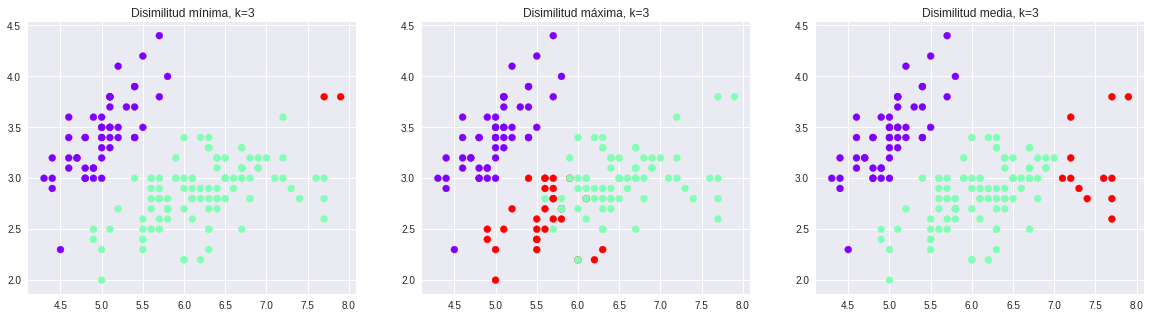

<Figure size 576x396 with 0 Axes>

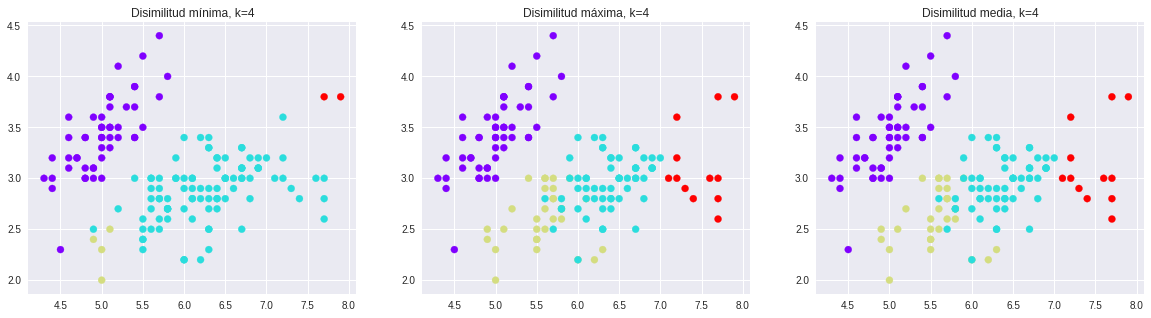

<Figure size 576x396 with 0 Axes>

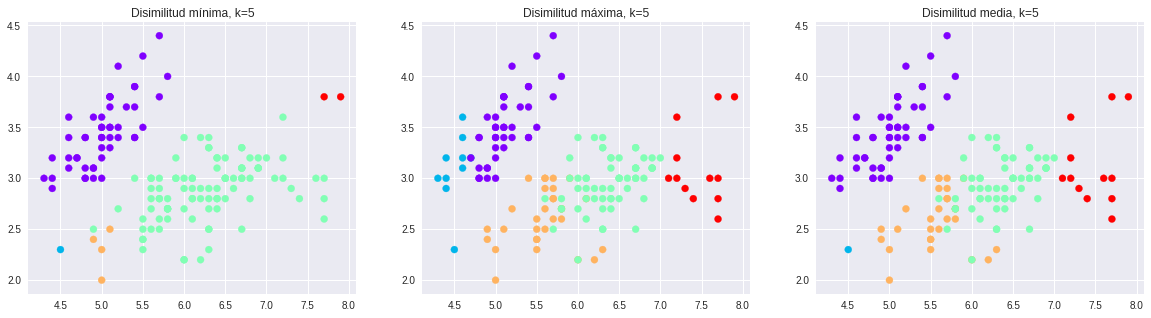

<Figure size 576x396 with 0 Axes>

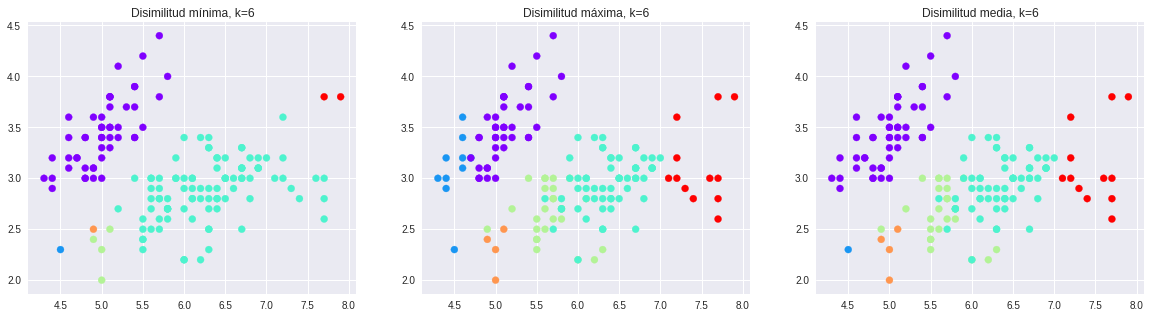

<Figure size 576x396 with 0 Axes>

In [0]:
#Evaluamos el método según diferentes valores de K y usando los 3 criterios de disimilitud: mínima, máxima, media

index_k=0
vector_clusters = {}
for K in range(2,7):
  vector_clusters[index_k]=evaluar_cluster_un(K)
  plot_cluster_un(Dx, vector_clusters[index_k])
  index_k=index_k+1

In [0]:
#creamos la variable para buscar el valor de K más optimo en función de calinski_harabaz_score
calinski_harabaz_score_mejor=0
K_optima=0
index_vect=0

#Buscamos el valor de K que optimiza la métrica intrinseca
for i in range(len(vector_clusters)):
  for y in range(len(vector_clusters[i])):
      if calinski_harabaz_score(Dx,vector_clusters[i][y]) > calinski_harabaz_score_mejor:
        K_optima=index_vect+2
        calinski_harabaz_score_mejor=calinski_harabaz_score(Dx,vector_clusters[i][y])
        metricas_evaluacion_int[4][0]=("Jerarquico silhouette_score "+'k=%s'%K_optima)
        metricas_evaluacion_int[4][1]=silhouette_score(Dx,vector_clusters[i][y])
        metricas_evaluacion_int[5][0]=("Jerarquico calinski_harabaz_score "+'k=%s'%K_optima)
        metricas_evaluacion_int[5][1]=calinski_harabaz_score(Dx,vector_clusters[i][y])

    





Metricas evaluación:
K=2


Metricas evaluación:
K=3


Metricas evaluación:
K=4


Metricas evaluación:
K=5


Metricas evaluación:
K=6


### Algroritmo Spectral

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklea

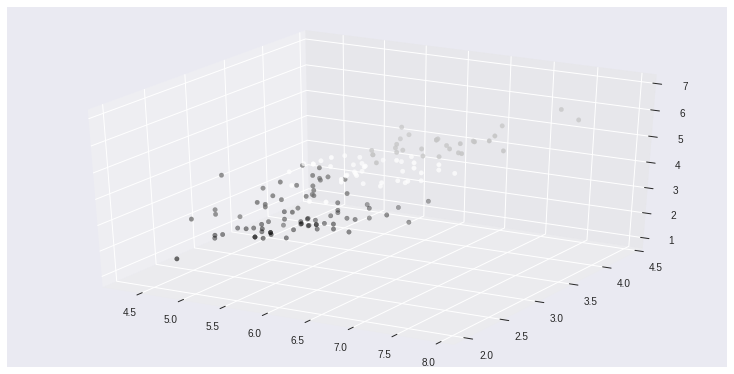

In [0]:
Dyp_sk_vector={}
index_vect=0
CHS=0

for num_knn in range(3,7):
  for num_k in range(2,5):
    clustering = SpectralClustering(n_clusters = num_k, 
                                  affinity = 'nearest_neighbors', n_neighbors = num_knn,
                                  random_state = 0).fit(Dx)
    Dyp_sk_vector[index_vect]=clustering.labels_
    index_vect = index_vect + 1

#fig = plt.figure(figsize=(10,5))
#ax = Axes3D(fig)
#ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=clustering.labels_)
  
  
for index_vect in range(len(Dyp_sk_vector)):
  if calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect])>CHS:
    clases=Dyp_sk_vector[index_vect]
    
#creamos la variable para buscar el valor de K más optimo en función de calinski_harabaz_score
calinski_harabaz_score_mejor=0
K_optima=0
index_vect=0

#Buscamos el valor de K que optimiza la métrica intrinseca
for index_vect in range(len(Dyp_sk_vector)):
  if calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect]) > calinski_harabaz_score_mejor:
    K_optima=index_vect+2
    calinski_harabaz_score_mejor=calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect])
    metricas_evaluacion_int[6][0]=("Sepctral silhouette_score "+'k=%s'%K_optima)
    metricas_evaluacion_int[6][1]=silhouette_score(Dx,Dyp_sk_vector[index_vect])
    metricas_evaluacion_int[7][0]=("Spectral calinski_harabaz_score "+'k=%s'%K_optima)
    metricas_evaluacion_int[7][1]=calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect])    
  
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dyp_sk_vector[index_vect])   
  

### Algoritmo DBScan

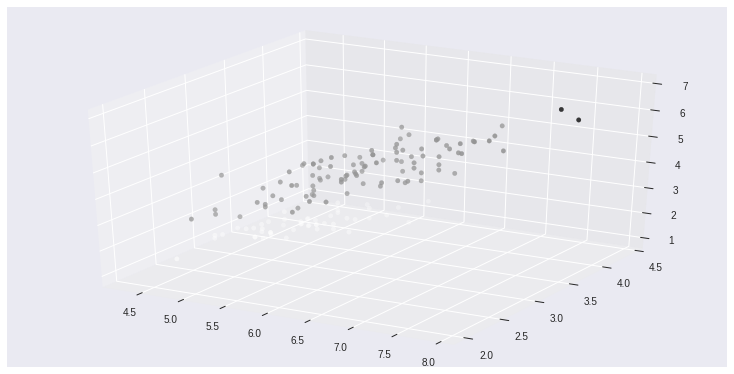

In [0]:
eps=0.3
M=1
Dyp_sk_vector={}
index_vect=0
CHS=0

#Usando las librerias de Python, buscamos la agrupación inicial
clustering = DBSCAN(eps=eps, min_samples=M).fit_predict(Dx)

#Iterativamente mejoramos la agrupación inicial
for M in range(1,3):
  for eps in np.arange(0.15, 0.8, 0.05):
    clustering = DBSCAN(eps=eps, min_samples=M).fit_predict(Dx)
    Dyp_sk_vector[index_vect]=clustering
    index_vect = index_vect + 1
  
for index_vect in range(len(Dyp_sk_vector)):
  if silhouette_score(Dx,Dyp_sk_vector[index_vect])>CHS:
    clases=Dyp_sk_vector[index_vect]

#creamos la variable para buscar el valor de K más optimo en función de calinski_harabaz_score
calinski_harabaz_score_mejor=0
K_optima=0
index_vect=0

#Buscamos el valor de K que optimiza la métrica intrinseca
for index_vect in range(len(Dyp_sk_vector)):
  if calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect]) > calinski_harabaz_score_mejor:
    K_optima=index_vect+2
    calinski_harabaz_score_mejor=calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect])
    metricas_evaluacion_int[8][0]=("DBScan silhouette_score "+'k=%s'%K_optima)
    metricas_evaluacion_int[8][1]=silhouette_score(Dx,Dyp_sk_vector[index_vect])
    metricas_evaluacion_int[9][0]=("DBScan calinski_harabaz_score "+'k=%s'%K_optima)
    metricas_evaluacion_int[9][1]=calinski_harabaz_score(Dx,Dyp_sk_vector[index_vect])   
  
#Imprimimos la representación gráfica de la agrupación para K optima  
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dyp_sk_vector[K_optima-2])




## Comparativa de mérticas

Comparamos los 5 distintos algoritmos y encontramos el algoritmo que obtiene mejor métrica.<br>
Al desconocer el agrupamiento real, solo podemos usar métricas intrinsecas.<br>


1.   Silhouette score
2.   Calinski harabaz score



In [0]:
#metrica medida Silhouette

metricas_Silhouette_int=[]
for i in range(5):
    metricas_Silhouette_int.append([])
    for j in range(2):
        metricas_Silhouette_int[i].append(None)

ind=0

for it in range(0,5):
  metricas_Silhouette_int[it][0]=metricas_evaluacion_int[ind][0]
  metricas_Silhouette_int[it][1]=metricas_evaluacion_int[ind][1]
  ind=ind+3

#Buscamos la mejor métrica entre los 5 algoritmos  
df_error_Silhouette = pd.DataFrame(data=metricas_Silhouette_int)
mejor_Silhouette=df_error_Silhouette.loc[df_error_Silhouette[1].idxmax()]

#Imprimimos la tabla de métricas
print("Tabla comparativa de métricas Silhouette")
print(df_Silhouette)
print("")

#metrica calinski_harabaz

metricas_calinski_harabaz=[]
for i in range(5):
    metricas_calinski_harabaz.append([])
    for j in range(2):
        metricas_calinski_harabaz[i].append(None)

ind=1
for it in range(0,5):
  metricas_calinski_harabaz[it][0]=metricas_evaluacion_int[ind][0]
  metricas_calinski_harabaz[it][1]=metricas_evaluacion_int[ind][1]
  ind=ind+3
  
#Buscamos la mejor métrica entre los 5 algoritmos
df_calinski_harabaz = pd.DataFrame(data=metricas_calinski_harabaz) 
mejor_calinski_harabaz=df_calinski_harabaz.loc[df_calinski_harabaz[1].idxmax()]

#Imprimimos la tabla de métricas
print("Tabla comparativa de métricas calinski_harabaz")
print(df_calinski_harabaz)
print("")
  




#Imprimimos el algoritmo con mejor métrica
print("Algoritmos con mejor métrica:")
print("")
print("Medida Silhouette:")
print(mejor_Silhouette[0])
print("")

#Imprimimos el algoritmo con mejor métrica

print("Medida calinski_harabaz:")
print(mejor_calinski_harabaz[0])


Algoritmos con mejor métrica:

Medida Silhouette:
Jerarquico calinski_harabaz_score k=2
Medida calinski_harabaz:
Spectral calinski_harabaz_score k=12
